In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inside the notebook
%matplotlib inline 
sns.set(style = "whitegrid")

df = pd.read_csv("imdb_sample.csv")

# Display the first 5 rows to inspect the data
df.head()

,Title,Year,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,Drama,9.3,Frank Darabont
1,The Godfather,1972,Crime,9.2,Francis Ford Coppola
2,The Dark Knight,2008,Action,9.0,Christopher Nolan
3,12 Angry Men,1957,Drama,9.0,Sidney Lumet
4,Schindler's List,1993,Biography,8.9,Steven Spielberg


In [ ]:

print("Rows, Columns:", df.shape)
df.info()

# Check for missing values and duplicate rows
print(df.isnull().sum())
print(df.duplicated().sum())

Rows, Columns: (50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        50 non-null     object 
 1   Year         50 non-null     int64  
 2   Genre        50 non-null     object 
 3   IMDB_Rating  50 non-null     float64
 4   Director     50 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
Title          0
Year           0
Genre          0
IMDB_Rating    0
Director       0
dtype: int64
0


In [ ]:
# Convert 'Year'numeric in case there are strings
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop missing values and duplicate rows
df = df.dropna()
df = df.drop_duplicates()


In [5]:
# Top 5 highest rated movies
top_rated = df[['Title','IMDB_Rating']].sort_values(by='IMDB_Rating', ascending=False).head(5)
print("Top 5 Movies by IMDB Rating:\n", top_rated)

# Count of movies per Genre
print("\nMovies per Genre:\n", df['Genre'].value_counts())

# Average rating per Genre
avg_rating = df.groupby('Genre')['IMDB_Rating'].mean()
print("\nAverage IMDB Rating per Genre:\n", avg_rating)


Top 5 Movies by IMDB Rating:
                       Title  IMDB_Rating
0  The Shawshank Redemption          9.3
1             The Godfather          9.2
2           The Dark Knight          9.0
3              12 Angry Men          9.0
4          Schindler's List          8.9

Movies per Genre:
 Genre
Drama        9
Crime        9
Action       6
Sci-Fi       5
Animation    5
Adventure    3
Thriller     3
Biography    2
Horror       2
Romance      2
Western      1
Comedy       1
History      1
Fantasy      1
Name: count, dtype: int64

Average IMDB Rating per Genre:
 Genre
Action       8.450000
Adventure    8.666667
Animation    8.440000
Biography    8.450000
Comedy       8.500000
Crime        8.633333
Drama        8.677778
Fantasy      8.200000
History      8.300000
Horror       8.400000
Romance      8.400000
Sci-Fi       8.340000
Thriller     8.400000
Western      8.800000
Name: IMDB_Rating, dtype: float64


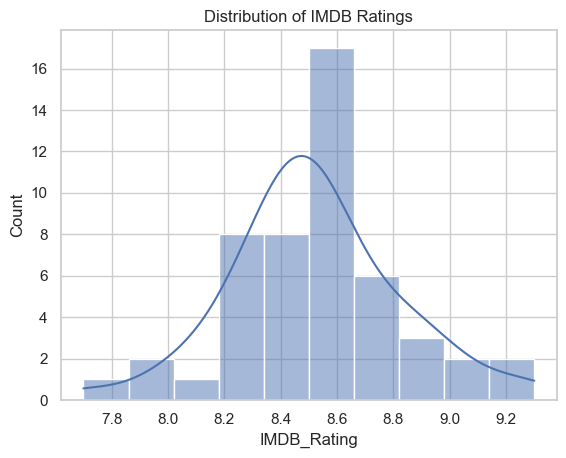

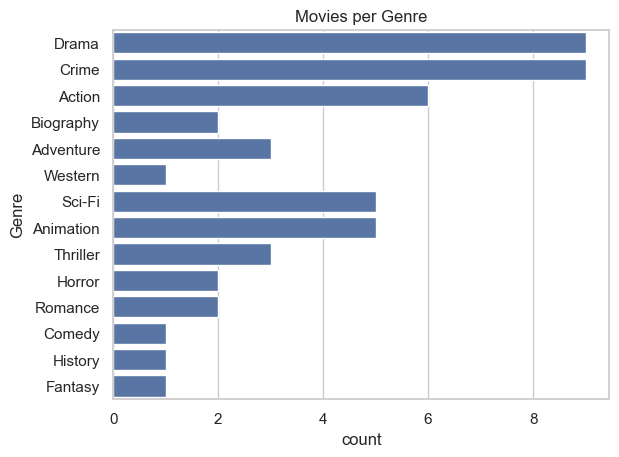

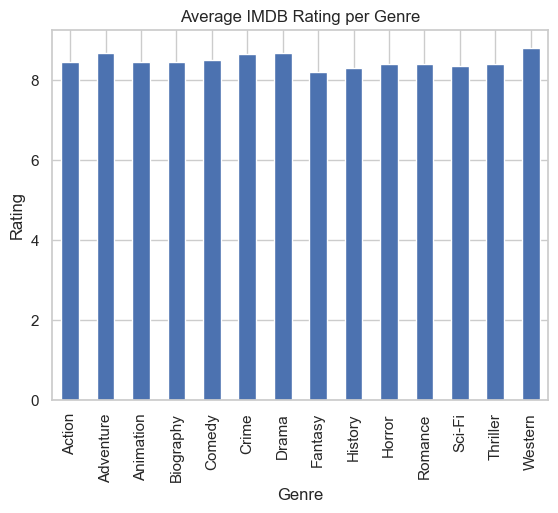

In [10]:
# Histogram of IMDB Ratings
sns.histplot(df['IMDB_Rating'], bins=10, kde=True)
plt.title("Distribution of IMDB Ratings")
plt.show()

# Bar plot: Movies per Genre
sns.countplot(data=df, y='Genre')
plt.title("Movies per Genre")
plt.show()

# Bar plot: Average rating per Genre
avg_rating.plot(kind='bar', title="Average IMDB Rating per Genre")
plt.ylabel("Rating")
plt.show()
